- **datetime** - hourly date + timestamp  

- **season:**
    * 1 = spring
    * 2 = summer
    * 3 = fall
    * 4 = winter 

- **holiday**** - whether the day is considered a holiday
- **workingday** - whether the day is neither a weekend nor holiday
- **weather**:
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

- **temp** - temperature in Celsius
- **atemp** - "feels like" temperature in Celsius
- **humidity** - relative humidity
- **windspeed** - wind speed
- **casual** - number of non-registered user rentals initiated
- **registered** - number of registered user rentals initiated
- **count** - number of total rentals

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import imageio

In [266]:
df = pd.read_csv('train.csv', parse_dates=True)

In [267]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df['x1']=df.index

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      10886 non-null  int64         
 1   holiday     10886 non-null  int64         
 2   workingday  10886 non-null  int64         
 3   weather     10886 non-null  int64         
 4   temp        10886 non-null  float64       
 5   atemp       10886 non-null  float64       
 6   humidity    10886 non-null  int64         
 7   windspeed   10886 non-null  float64       
 8   casual      10886 non-null  int64         
 9   registered  10886 non-null  int64         
 10  count       10886 non-null  int64         
 11  x1          10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.1 MB


In [269]:
corr = df.corr()


<AxesSubplot:>

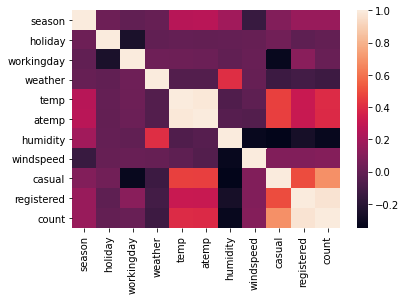

In [270]:
sns.heatmap(corr)

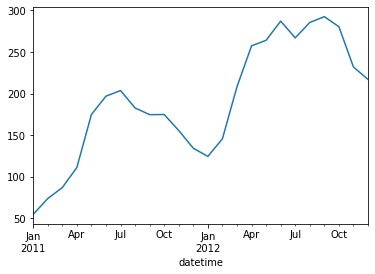

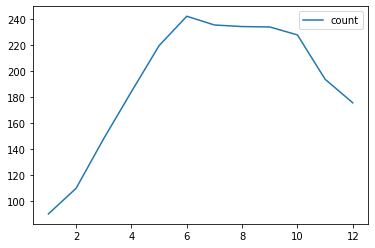

In [427]:
#plot of mean counts of df grouped by months
df.groupby(pd.Grouper(freq='M'))['count'].mean().plot()

s4 = pd.DataFrame(df.groupby([lambda x: x.month])['count'].mean())
s4.plot()
#Demand for bikes is higher for the summer and there was an overall increase in demand between 2011 and 2012



SyntaxError: invalid syntax (<ipython-input-443-20dfa54f967b>, line 1)

In [273]:
h=12
starttime=datetime.datetime(year=2011, month=6, day=1, hour=h, minute=00)
starttime.time()
endtime= starttime + datetime.timedelta(minutes=3)
endtime.time()

datetime.time(12, 3)

In [388]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [387]:
#fig=plt.figure(figsize=(12,6))
#plt.ylim(0, 650) 
#g=sns.scatterplot(x='x1', y='count', data=df['2011-06'].between_time(starttime.time(),endtime.time()), hue='workingday', size="atemp")
#g.legend_.remove()
#g.text('2011-06-17',600, starttime.time(), fontsize=20, alpha=0.2)
#plt.xticks(rotation=45)
#g.get_figure().savefig(str(starttime)+".png") #Makes figure and saves it
#g.get_figure().clf() # this clears the figure
#fig.savefig(str(starttime)+".png")
    


In [386]:
#for h in range(0,24):
#    starttime=datetime.datetime(year=2011, month=6, day=1, hour=h, minute=00)
#    endtime= starttime + datetime.timedelta(minutes=3)
#    plt.figure(figsize=(12,6))
#    plt.ylim(0, 650) 
#    g=sns.scatterplot(x='x1', y='count', data=df['2011-06'].between_time(starttime.time(),endtime.time()), hue='workingday', size="atemp")
#    g.legend_.remove()
#    g.text('2011-06-17',600, starttime.time(), fontsize=20, alpha=0.2)
#    plt.xticks(rotation=45)
#    g.get_figure().savefig(str(starttime)+".png") #Makes figure and saves it
#    g.get_figure().clf() # this clears the figure
    
    

In [302]:
#images = []

#for i in range(0, 24):
#    starttime=datetime.datetime(year=2011, month=6, day=1, hour=i, minute=00)
#    filename = str(starttime)+".png"
#    images.append(imageio.imread(filename))
#
#imageio.mimsave('june2011.gif', images, fps=10)

Try and find "peak times" during work days: 

In [373]:
df2=df.loc[df['workingday']==1]
df3=df.loc[df['workingday']==0]

In [390]:
s2 = pd.DataFrame(df2.groupby([lambda x: x.hour])['count'].mean())
s3 = pd.DataFrame(df3.groupby([lambda x: x.hour])['count'].mean())
s2.head()

,count
0,36.732258
1,16.003236
2,8.436066
3,4.892734
4,5.363636


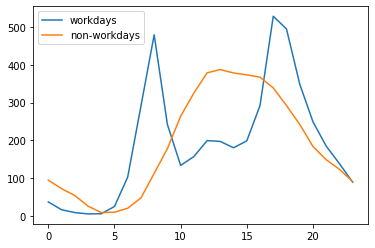

In [398]:
plt.plot(s2, label = 'workdays')
plt.plot(s3, label = 'non-workdays')
plt.legend()

There are two peaks in the data for work days where more bikes are taken out, and one peak in the day on both working and non working days where more bikes are rented

In [384]:
ser2=s2['count']
peak2_df = ser2[(ser2.shift(1) < ser2) & (ser2.shift(-1) < ser2)]
peak2 = peak2_df.index
peak2

Int64Index([8, 12, 17], dtype='int64')

The peak hours on workdays are 8, 12 and 17

In [385]:
ser3=s3['count']
peak3_df = ser3[(ser3.shift(1) < ser3) & (ser3.shift(-1) < ser3)]
peak3 = peak3_df.index
peak3

Int64Index([13], dtype='int64')

The  peak hour on non-work days is 13

<AxesSubplot:>

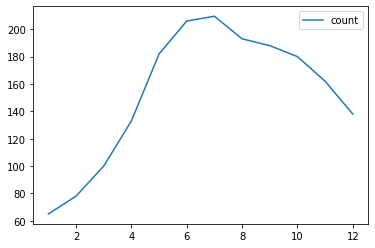

In [445]:
df['weekday']=df.index.weekday


(df.groupby(['workingday', 'weekday']).count()/24).round(1)



season  holiday  weather  temp  atemp  humidity  \
workingday weekday                                                    
0          0          10.0     10.0     10.0  10.0   10.0      10.0   
           2           1.0      1.0      1.0   1.0    1.0       1.0   
           4           2.0      2.0      2.0   2.0    2.0       2.0   
           5          66.0     66.0     66.0  66.0   66.0      66.0   
           6          65.8     65.8     65.8  65.8   65.8      65.8   
1          0          54.7     54.7     54.7  54.7   54.7      54.7   
           1          64.1     64.1     64.1  64.1   64.1      64.1   
           2          63.6     63.6     63.6  63.6   63.6      63.6   
           3          64.7     64.7     64.7  64.7   64.7      64.7   
           4          61.7     61.7     61.7  61.7   61.7      61.7   

                    windspeed  casual  registered  count    x1  
workingday weekday                                              
0          0             10.0    10.0        10.0   10.0  10.0  
           2              1.0     1.0         1.0    1.0   1.0  
           4              2.0     2.0         2.0    2.0   2.0  
           5             66.0    66.0        66.0   66.0  66.0  
           6             65.8    65.8        65.8   65.8  65.8  
1          0             54.7    54.7        54.7   54.7  54.7  
           1             64.1    64.1        64.1   64.1  64.1  
           2             63.6    63.6        63.6   63.6  63.6  
           3             64.7    64.7        64.7   64.7  64.7  
           4             61.7    61.7        61.7   61.7  61.7

There were ten public holidays on a monday, one on a wednesday, two on a friday

In [447]:
df2 = df.loc[df['workingday'] == 0]

In [455]:
df2.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='datetime', length=3474)

ValueError: x and y must be the same size

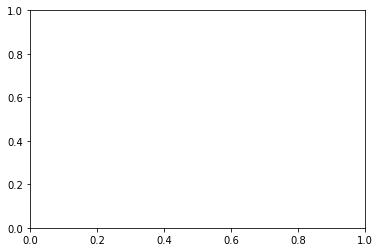

In [454]:
plt.scatter(df2.groupby('weekday'), df2['count'])

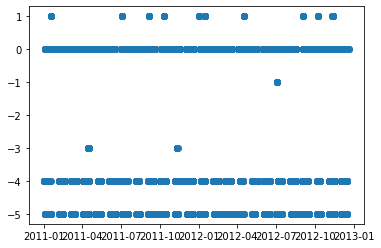

In [456]:
df2 = df[['weekday', 'workingday']].apply(lambda x: (x-1))
df2['w*w'] = df2['weekday']*df2['workingday']
df2['count'] = df['count']
plt.scatter(df2.index, df2['w*w'])

In [457]:
df['hour'] = df.index.hour

<AxesSubplot:xlabel='hour'>

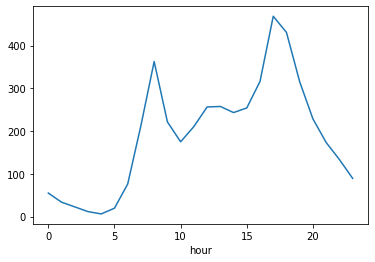

In [463]:
df.groupby(['hour'])['count'].mean().plot()

<AxesSubplot:xlabel='temp', ylabel='count'>

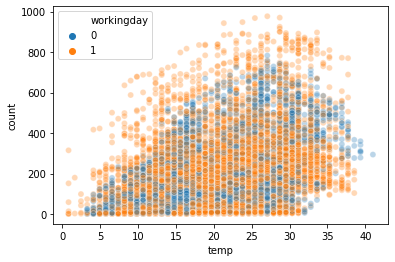

In [477]:
sns.scatterplot(x=df['temp'], y=df['count'], data=df, hue='workingday', alpha=0.3)

In [485]:
#Extracting Year
df['year'] = df.index.year

#Extracting Month
df['month'] = df.index.month

#Extracting the weekday name of the date
df['day_name'] = df.index.day_name()

#Extracting Month
df['week'] = df.index.week

In [486]:
df.columns


Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'x1',
       'weekday', 'hour', 'year', 'month', 'day_name', 'week'],
      dtype='object')

<AxesSubplot:xlabel='week', ylabel='count'>

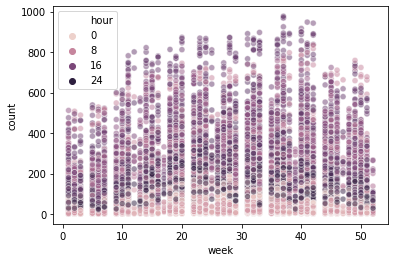

In [494]:
sns.scatterplot(df['week'], df['count'], data=df, hue=df['hour'], alpha=0.5)